In [1]:
## Manipulación de datos
import pandas as pd
import numpy as np

## Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Modelos
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor
import statsmodels.api as sm
import shap

In [2]:
df = pd.read_csv(r'..\..\data\processed\ML_future.csv')
df1 = pd.read_csv(r'..\..\data\processed\Merch_ML.csv')

In [3]:
train = df.iloc[:290]
test = df.iloc[290:]

In [4]:
X_train_cp, y_train_cp = train.drop(columns=['Cantidad_Productos']), train['Cantidad_Productos']
X_test_cp, y_test_cp = test.drop(columns=['Cantidad_Productos']), test['Cantidad_Productos']

In [5]:
X_train_vu, y_train_vu = train.drop(columns=['Ventas_X_Unidad']), train['Ventas_X_Unidad']
X_test_vu, y_test_vu = test.drop(columns=['Ventas_X_Unidad']), test['Ventas_X_Unidad']

In [6]:
X_train_np, y_train_np = train.drop(columns=['Numero_pedidos']), train['Numero_pedidos']
X_test_np, y_test_np = test.drop(columns=['Numero_pedidos']), test['Numero_pedidos']

In [7]:
X_train_ts, y_train_ts = train.drop(columns=['Total_Sales']), train['Total_Sales']
X_test_ts, y_test_ts = test.drop(columns=['Total_Sales']), test['Total_Sales']

In [8]:
stacking_clf_ts = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('rf',  RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)),
        ('b_ridge', BayesianRidge()),
        ('lasso', Lasso()),
        ('enet', ElasticNet()),
    ],
    final_estimator=Ridge(alpha=1.0, solver="sag"),
    cv=3  # número de folds en validación cruzada
)
stacking_clf_ts.fit(X_train_ts, y_train_ts)
stacking_pred_ts = stacking_clf_ts.predict(X_test_ts)

rmse_stack = root_mean_squared_error(y_test_ts,stacking_pred_ts)
mae_stack = mean_absolute_error(y_test_ts,stacking_pred_ts)
r2_stack = r2_score(y_test_ts, stacking_pred_ts)
print(f'RMSE: {rmse_stack:.4f}')
print(f'MAE: {mae_stack:.4f}')
print(f'R² Score: {r2_stack:.4f}')

RMSE: 183.0329
MAE: 142.4962
R² Score: 0.9223


In [9]:
stacking_clf = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('rf',  RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)),
        ('b_ridge', BayesianRidge()),
        ('lasso', Lasso()),
        ('enet', ElasticNet()),
    ],
    final_estimator=Ridge(alpha=1.0, solver="sag"),
    cv=3  # número de folds en validación cruzada
)
stacking_clf.fit(X_train_np, y_train_np)
stacking_pred_np = stacking_clf.predict(X_test_np)

rmse_stack = root_mean_squared_error(y_test_np,stacking_pred_np)
mae_stack = mean_absolute_error(y_test_np,stacking_pred_np)
r2_stack = r2_score(y_test_np, stacking_pred_np)
print(f'RMSE: {rmse_stack:.4f}')
print(f'MAE: {mae_stack:.4f}')
print(f'R² Score: {r2_stack:.4f}')

RMSE: 0.3766
MAE: 0.2500
R² Score: 0.9924


In [10]:
stacking_clf.fit(X_train_vu, y_train_vu)
stacking_pred_vu = stacking_clf.predict(X_test_vu)

rmse_stack = root_mean_squared_error(y_test_vu,stacking_pred_vu)
mae_stack = mean_absolute_error(y_test_vu,stacking_pred_vu)
r2_stack = r2_score(y_test_vu, stacking_pred_vu)
print(f'RMSE: {rmse_stack:.4f}')
print(f'MAE: {mae_stack:.4f}')
print(f'R² Score: {r2_stack:.4f}')

RMSE: 125.3646
MAE: 94.0087
R² Score: 0.8893


In [11]:
stacking_clf.fit(X_train_cp, y_train_cp)
stacking_pred_cp = stacking_clf.predict(X_test_cp)

rmse_stack = root_mean_squared_error(y_test_cp,stacking_pred_cp)
mae_stack = mean_absolute_error(y_test_cp,stacking_pred_cp)
r2_stack = r2_score(y_test_cp, stacking_pred_cp)
print(f'RMSE: {rmse_stack:.4f}')
print(f'MAE: {mae_stack:.4f}')
print(f'R² Score: {r2_stack:.4f}')

RMSE: 0.5711
MAE: 0.4252
R² Score: 0.9946


In [12]:
stacking_pred_cp = stacking_pred_cp.astype(int)
stacking_pred_np = stacking_pred_np.astype(int)
stacking_pred_vu = stacking_pred_vu.astype(int)

In [13]:
print(stacking_pred_cp)
print(stacking_pred_np)
print(stacking_pred_vu)

[26 20 29 32 33 24 23 40 31 42 30 31 32 22 39 31 39 33 33 19 26 52 36 44
 33 37 36 20 16 29 46 35 33 39 43 33 41 31 27 45 28 41 42 42 27 37 40 37
 23 25 34 40 33 19 39 32 34 26 22 22 27 35 22 31 39 32 22 21 17 28 36 26
 43 22 33 34]
[19 16 18 15 25 20 14 24 17 25 14 20 16 12 25 18 24 17 20 14 16 28 22 23
 19 25 22 15 10 21 25 20 21 22 25 21 21 20 18 25 18 23 23 25  8 18 19 21
 14 17 20 21 22 13 26 23 17 18 18 11 18 18 15 21 24 18  9 17 13 18 20 16
 24 15 20 17]
[1372 1095 1175 1059 1843 1608  950 1575 1087 1923 1129 1284 1128  814
 1749 1453 1683 1237 1447 1067 1255 1940 1415 1497 1379 1473 1474 1094
  771 1568 1566 1279 1314 1559 1897 1427 1183 1561 1213 1562 1131 1840
 1780 1792  786 1272 1307 1292 1059 1200 1581 1474 1474 1058 2066 2018
 1364 1157 1144  913 1099 1473  990 1393 1697 1128  765 1145  944 1342
 1467 1306 2093  892 1514  904]


In [14]:
df1.sort_values('Order_Date',inplace=True)

In [15]:
df1.set_index('Order_Date',inplace=True)

In [16]:
df1.index = pd.to_datetime(df1.index) 

In [17]:
future_dates = pd.date_range(start=df1.index[-1] + pd.Timedelta(days=1), periods=76, freq='D')

In [18]:
dic = {
    'Cantidad_Productos': list(stacking_pred_cp),  
    'Numero_pedidos': list(stacking_pred_np),
    'Ventas_X_Unidad': list(stacking_pred_vu),
    'Order_Date': list(future_dates),
    'Total_Sales': list(stacking_pred_ts)
}

In [19]:
df2 = pd.DataFrame(dic)

In [20]:
df.columns

Index(['Ventas_X_Unidad', 'Cantidad_Productos', 'Total_Sales',
       'Numero_pedidos', 'diasemana', 'M_CantidadP_NumP',
       'Order_to_Product_Ratio', 'Pedidos_x_Cantidad'],
      dtype='object')

In [21]:
df2['M_CantidadP_NumP'] = df2['Cantidad_Productos'] / df2['Numero_pedidos']  # Promedio de productos por pedido
df2['Order_to_Product_Ratio'] = df2['Numero_pedidos'] / df2['Cantidad_Productos']  # Ratio de pedidos a productos
df2['Pedidos_x_Cantidad'] = df2['Numero_pedidos'] * df2['Cantidad_Productos']

In [22]:
df2.set_index('Order_Date',inplace=True)

In [23]:
df2['diasemana'] = df2.index.dayofweek

In [24]:
df2.drop(columns='Total_Sales',inplace=True)

In [25]:
df2 = df2[['Ventas_X_Unidad','Cantidad_Productos','Numero_pedidos','diasemana','M_CantidadP_NumP','Order_to_Product_Ratio','Pedidos_x_Cantidad']]

In [26]:
pred = stacking_clf_ts.predict(df2)

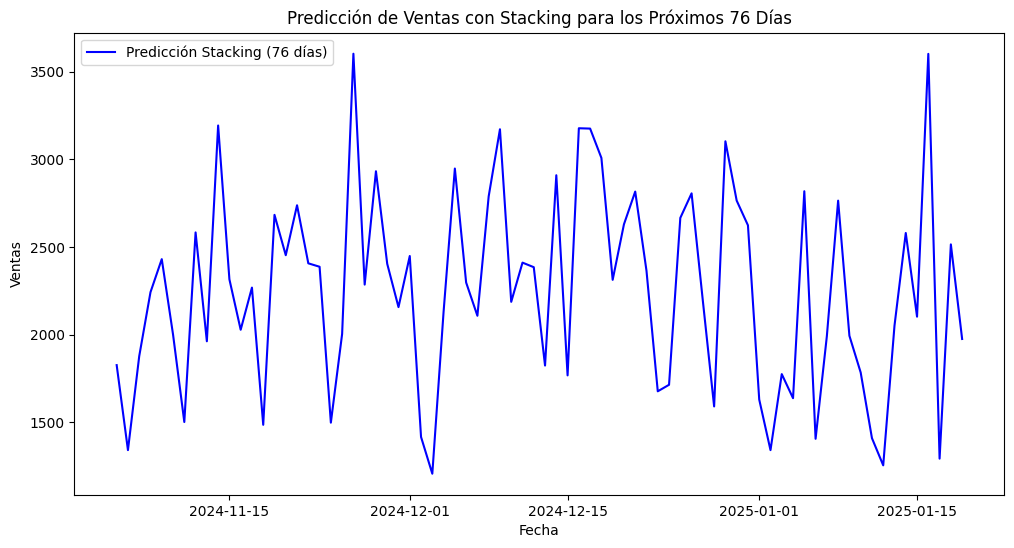

In [27]:
plt.figure(figsize=(12,6))

# Graficar predicciones futuras
plt.plot(df2.index, pred, label="Predicción Stacking (76 días)", color='blue')

# Configurar etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.title("Predicción de Ventas con Stacking para los Próximos 76 Días")
plt.legend()

# Mostrar gráfico
plt.show()